For a connected and *undirected graph*, a *spanning tree* of that graph is a subgraph that is a tree and connects all the vertices together. A single graph can have multiple spanning trees.

A **Spanning Tree** is a tree which have V vertices and V-1 edges. All nodes in a spanning tree are reachable from each other.

A **Minimum Spanning Tree (MST)** or minimum weight spanning tree for a weighted, connected, undirected graph is a spanning tree having a weight less than or equal to the weight of every other possible spanning tree. The weight of a spanning tree is the sum of weights given to each edge of the spanning tree. In short out of all spanning trees of a given graph, the spanning tree having **minimum weight** is MST.

**Necessary conditions for MST**:
1. It must not form a cycle i.e., no edge is traversed twice
2. There must be no other spanning tree with lesser weight

# Prim's Algorithm for MST

Prim’s is a Greedy algorithm (see Dijkstra). This algorithm always starts with a single node and moves through several adjacent nodes, in order to explore all of the connected edges along the way.



```
The algorithm starts with an empty spanning tree. The idea is to maintain two
 sets of vertices. The first set contains the vertices already included in the 
 MST, and the other set contains the vertices not yet included. At every step, 
 it considers all the edges that connect the two sets and picks the minimum 
 weight edge from these edges. After picking the edge, it moves the other 
 endpoint of the edge to the set containing MST. 
```

The working of Prim's algorithm can be described by using the following steps:

1. Determine an arbitrary vertex as the starting vertex of the MST.
2. Follow steps 3 to 5 till there are vertices that are not included in the MST (known as fringe vertex).
3. Find edges connecting any tree vertex with the fringe vertices.
4. Find the minimum among these edges.
5. Add the chosen edge to the MST if it does not form any cycle.
6. Return the MST and exit

## Illustration of Prim's Algorithm

Consider the following graph as an example for which we need to find the MST

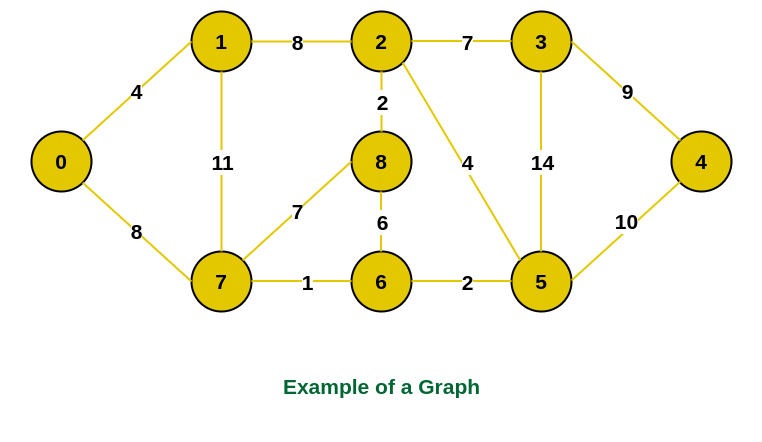

**Step 1**: Firstly, we select an arbitrary vertex that acts as the starting vertex of the MST. Here, we have selected vertex **0** as the starting vertex.
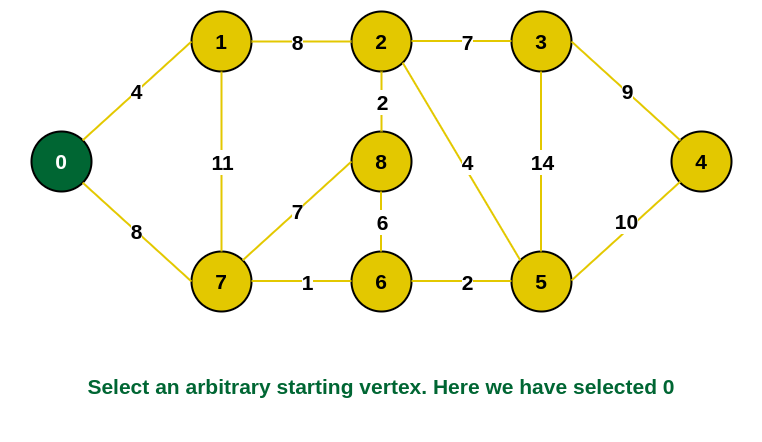

**Step 2**: All the edges connecting the incomplete MST and other vertices are the edges {0, 1} and {0, 7}. Between these two the edge with minimum weight is {0, 1}. So include the edge and vertex 1 in the MST.

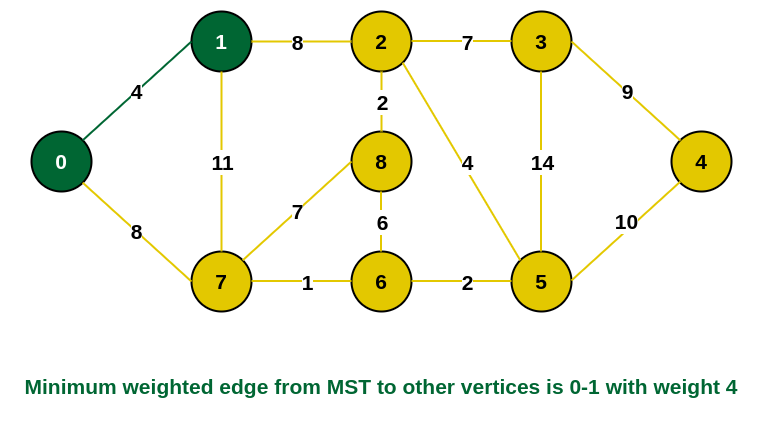

**Step 3**: The edges connecting the incomplete MST to other vertices are {0, 7}, {1, 7} and {1, 2}. Among these edges the minimum weight is 8 which is of the edges {0, 7} and {1, 2}. Let us here include the edge {0, 7} and the vertex 7 in the MST. [We could have also included edge {1, 2} and vertex 2 in the MST].

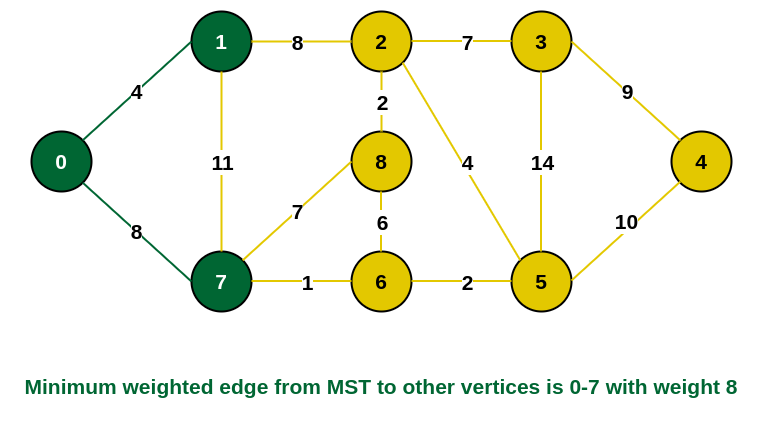

**Step 4**: The edges that connect the incomplete MST with the fringe vertices are {1, 2}, {7, 6} and {7, 8}. Add the edge {7, 6} and the vertex 6 in the MST as it has the least weight (i.e., 1).

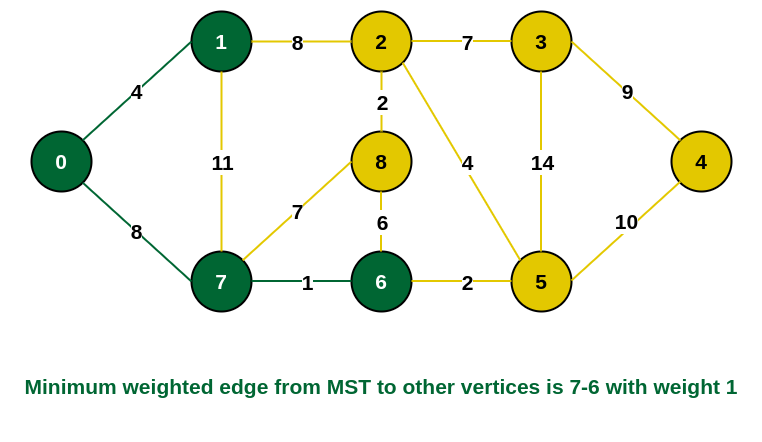

**Step 5**: The connecting edges now are {7, 8}, {1, 2}, {6, 8} and {6, 5}. Include edge {6, 5} and vertex 5 in the MST as the edge has the minimum weight (i.e., 2) among them.

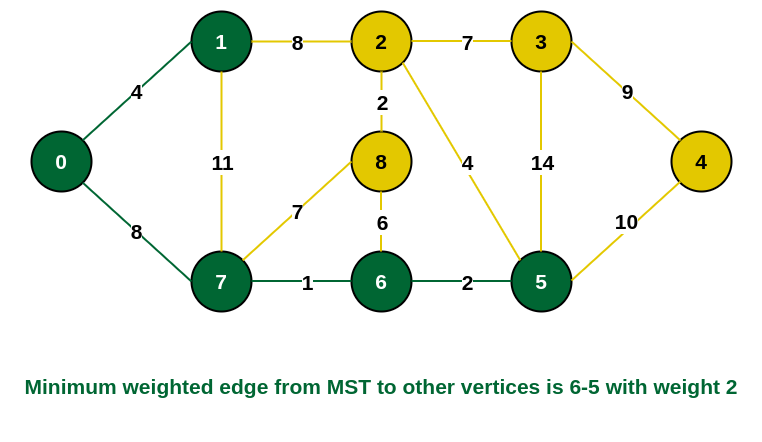


**Step 6**: Among the current connecting edges, the edge {5, 2} has the minimum weight. So include that edge and the vertex 2 in the MST.

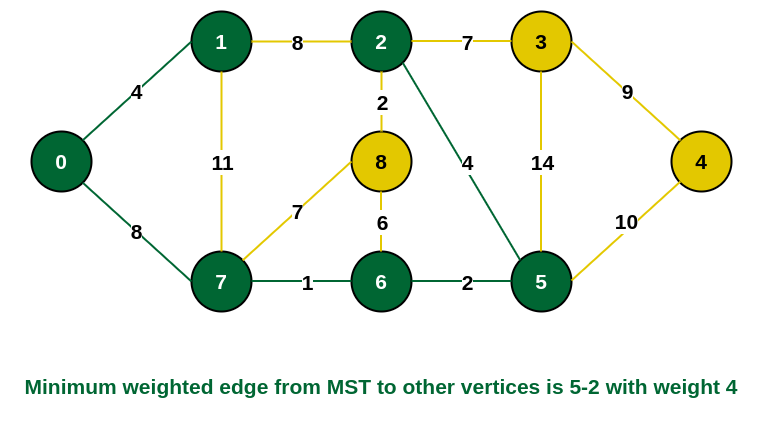

**Step 7**: The connecting edges between the incomplete MST and the other edges are {2, 8}, {2, 3}, {5, 3} and {5, 4}. The edge with minimum weight is edge {2, 8} which has weight 2. So include this edge and the vertex 8 in the MST.

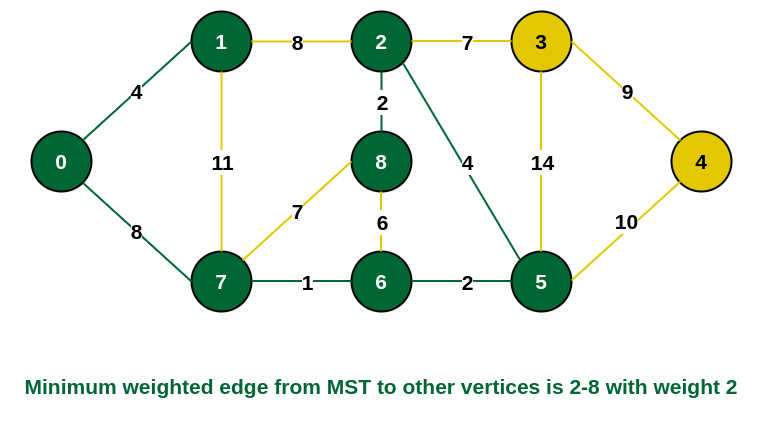

**Step 8**: See here that the edges {7, 8} and {2, 3} both have same weight which are minimum. But 7 is already part of MST. So we will consider the edge {2, 3} and include that edge and vertex 3 in the MST.

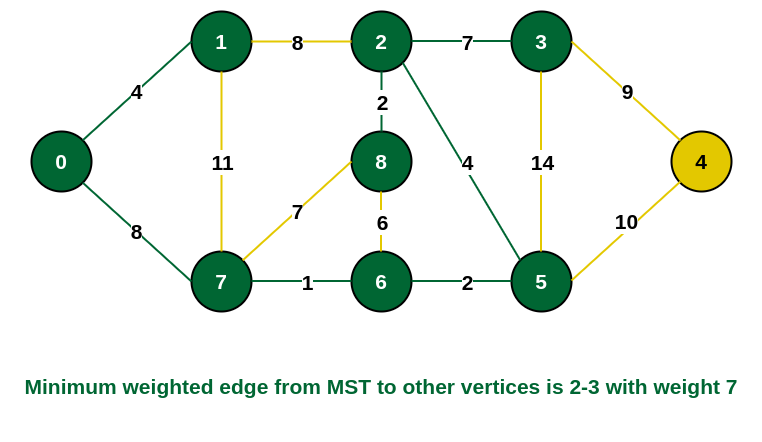

**Step 9**: Only  the vertex 4 remains to be included. The minimum weighted edge from the incomplete MST to 4 is {3, 4}.

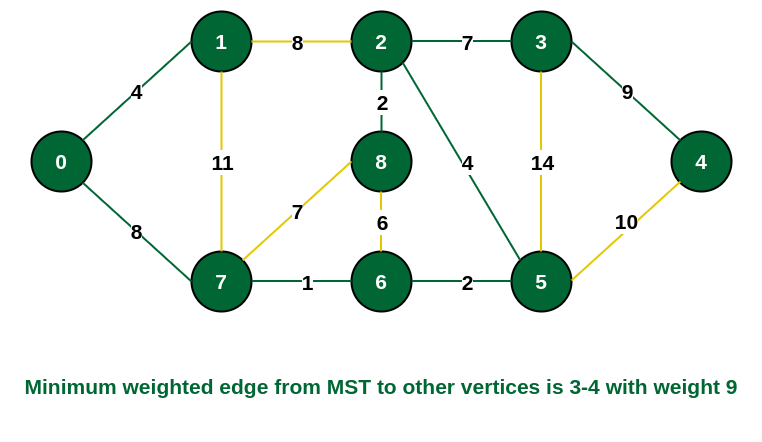

The final structure of the MST is as follows and the weight of the edges of the MST is (4 + 8 + 1 + 2 + 4 + 2 + 7 + 9) = 37.

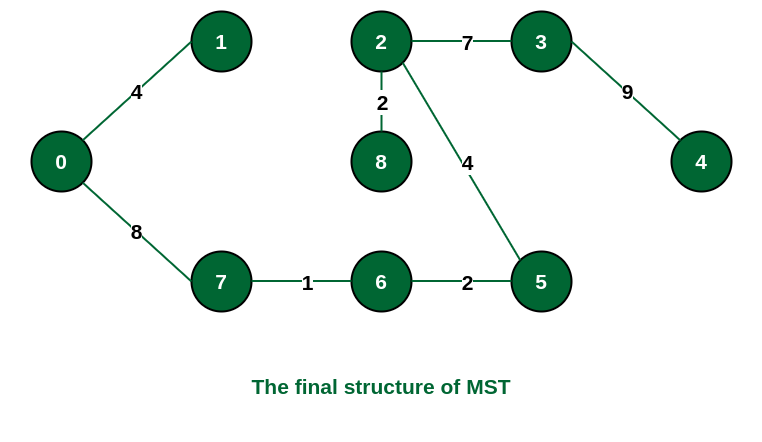

## Implementing Prim's Algorithm

Follow the given steps to utilize the Prim’s Algorithm mentioned above for finding MST of a graph:

1. Create a set **mstSet** that keeps track of vertices already included in MST. 
2. Assign a key value to all vertices in the input graph. Initialize all key values as INFINITE. Assign the key value as 0 for the first vertex so that it is picked first. 
3. While **mstSet** doesn’t include all vertices 
3. Pick a vertex **u** that is not there in **mstSet** and has a minimum key value. 
3. Include **u** in the **mstSet**. 
3. Update the key value of all adjacent vertices of **u**. To update the key values, iterate through all adjacent vertices. 
3. For every adjacent vertex **v**, if the weight of edge **{u,v}** is less than the previous key value of **v**, update the key value as the weight of **{u,v}**.


The idea of using key values is to pick the minimum weight edge from the cut. The key values are used only for vertices that are not yet included in MST, the key value for these vertices indicates the minimum weight edges connecting them to the set of vertices included in MST.

In [1]:
import sys

class Graph:

  def __init__(self, vertices):
    self.vertices = vertices
    self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

  # finds the vertex with minimum distance value for the set of vertices
  # not yet included in the shortest path tree
  def min_key(self, key, mstSet):
    _min = sys.maxsize

    for v in range(self.vertices):
      if key[v] < _min and mstSet[v] == False:
        _min = key[v]
        min_index = v
    return min_index
  

  def primMST(self):
    # key values to pick minimum weight edge
    key = [sys.maxsize] * self.vertices
    # array to store the constructed MST
    parent = [None] * self.vertices
    # make key 0 so that this vertex is picked as first vertex
    key[0] = 0
    mstSet = [False] * self.vertices

    parent[0] = -1 # first node is always the root of the MST

    for cout in range(self.vertices):
      # pick the minimum distance vertex from the set of vertices not yet
      # processed.
      # u always equal to the source node in the first iteration
      u = self.min_key(key, mstSet)

      # put the minimum distance vertex in the shortest path tree
      mstSet[u] = True

      # update distance values of the adjacent vertices of the picked vertex
      # only if the current distance is greater than the new distance and the
      # vertex is not in the shortest path tree
      for v in range(self.vertices):
        # graph[u][v] is non zero only for adjacent vertices
        # mstSet[v] is false for vertices not yet included in the MST
        # update the key only if graph[u][v] is smaller than key[v]
        if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
          key[v] = self.graph[u][v]
          parent[v] = u

    return parent

In [2]:
g = Graph(5)
g.graph = [[0, 2, 0, 6, 0],
           [2, 0, 3, 8, 5],
           [0, 3, 0, 0, 7],
           [6, 8, 0, 0, 9],
           [0, 5, 7, 9, 0]]

mst = g.primMST()

In [3]:
def printMST(mst, graph):
  print("Edge \tWeight")
  for i in range(1, len(mst)):
    print(mst[i], "-", i, "\t", graph[i][mst[i]])

In [5]:
printMST(mst, g.graph)

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


**Time Complexity: O(V^2)**, If the input *graph is represented using an adjacency list*, then the time complexity of Prim’s algorithm can be reduced to **O(E * logV)** with the help of a binary heap.  In this implementation, we are always considering the spanning tree to start from the root of the graph

**Auxiliary Space: O(V)**